<a href="https://colab.research.google.com/github/rbhattar07/Python-Projects--Data-Analysis/blob/main/Los_Angeles_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from google.colab import files

files.upload()

Saving kaggle-USCC.json to kaggle-USCC.json


{'kaggle-USCC.json': b'{"username":"riddhbhattar","key":"f7363c0fb7a444e5f636f321f1cf547c"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Feb 28 16:11 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!pwd
!kaggle datasets list

/content
ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
yasserh/wine-quality-dataset                                     Wine Quality Dataset                                21KB  2022-01-15 19:15:11           7551  
mkoklu42/pistachio-dataset                                       Pistachio Dataset                                    2MB  2022-02-11 21:06:50             57  
prasertk/netflix-subscription-price-in-different-countries       Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           5803  
majyhain/height-of-male-and-female-by-country-2022               Height of Male and Female by Country 2022            4KB  2022-02-02 00:40:19           2997  
ashishjangra27/ted-talks       

In [8]:
!kaggle datasets download -d hemil26/crime-in-los-angeles

 47% 9.00M/19.3M [00:00<00:00, 64.6MB/s]
100% 19.3M/19.3M [00:00<00:00, 90.4MB/s]


In [9]:
!unzip 'crime-in-los-angeles.zip'

Archive:  crime-in-los-angeles.zip
  inflating: MO_CODES_Numerical_20191119.pdf  
  inflating: UCR-COMPSTAT062618.pdf  
  inflating: UCR_Manual.pdf          
  inflating: crime_in_la.csv         


# Quantitative Analysis
## Los Angeles Crime Data
Source : Kaggle

This data is collected on the basis of LAPD radio comms and Investigation done by them after the crime is reported. It contains crime data from 2020 to present(Feb 2022). In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.
The Dataset includes 20 columns which includes information on areas such as -

Record Number
Date and time at which crime was reported/occurred
Victim Age,Sex, Ethnicity
Location where the crime took place
Weapon of crime
Status of the case
Acknowledgements
The data was provided by https://data.lacity.org/, y'all can find the original dataset being updated here
banner photo by Jake Blucker

Inspiration
EDA and Visulisation of the cases
Crime rate prediction and analysis
Where and when is mostly the crime commited?
What is the most common timing/date for most crimes to occur
Most common type of crime
In which Los Angeles Patrol Division(Area) does most crime reported?

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

## Download the Data

In [11]:
data_file = '/content/crime_in_la.csv'

In [12]:
crime_la_df = pd.read_csv(data_file)
crime_la_df

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431856,220804602,16/01/2022,11:00,8,West LA,852,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400,27,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1600 FEDERAL AV,34.0413,-118.4561
431857,220805064,27/01/2022,19:00,8,West LA,884,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,2300 S BENTLEY AV,34.0392,-118.4358
431858,222005112,20/01/2022,22:00,20,Olympic,2062,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,1814 2000 0421 0913,50,F,H,SINGLE FAMILY DWELLING,511.0,VERBAL THREAT,IC,Invest Cont,1200 S MANHATTAN PL,34.0494,-118.3102
431859,221005507,09/02/2022,15:30,10,West Valley,1024,510,VEHICLE - STOLEN,0,0,X,X,PARKING LOT,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,18800 SHERMAN WY,34.2011,-118.5426


In [13]:
crime_la_df['amount_crime'] = 1

## Data Preparation and Cleaning
- Information about the data
- Statistical Information about the data
- Remove missing rows
- Remove duplicates

In [14]:
crime_la_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431861 entries, 0 to 431860
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           431861 non-null  int64  
 1   DATE OCC        431861 non-null  object 
 2   TIME OCC        431861 non-null  object 
 3   AREA            431861 non-null  int64  
 4   AREA NAME       431861 non-null  object 
 5   Rpt Dist No     431861 non-null  int64  
 6   Crm Cd          431861 non-null  int64  
 7   Crm Cd Desc     431861 non-null  object 
 8   Mocodes         431861 non-null  object 
 9   Vict Age        431861 non-null  int64  
 10  Vict Sex        431861 non-null  object 
 11  Vict Descent    431861 non-null  object 
 12  Premis Desc     431688 non-null  object 
 13  Weapon Used Cd  431861 non-null  float64
 14  Weapon Desc     431861 non-null  object 
 15  Status          431861 non-null  object 
 16  Status Desc     431861 non-null  object 
 17  LOCATION  

In [15]:
crime_la_df.describe()

,DR_NO,AREA,Rpt Dist No,Crm Cd,Vict Age,Weapon Used Cd,LAT,LON,amount_crime
count,4.318610e+05,431861.000000,431861.000000,431861.000000,431861.000000,431861.000000,431861.000000,431861.000000,431861.0
mean,2.073899e+08,10.785357,1124.786881,506.200789,29.956898,450.108109,33.892514,-117.726751,1.0
std,6.216315e+06,6.058061,605.871959,209.545481,21.722328,99.773630,2.477673,8.598107,0.0
min,8.170000e+02,1.000000,101.000000,110.000000,-1.000000,101.000000,0.000000,-118.667600,1.0
25%,2.012216e+08,6.000000,628.000000,330.000000,11.000000,400.000000,34.010900,-118.430100,1.0
50%,2.103065e+08,11.000000,1146.000000,480.000000,31.000000,500.000000,34.058200,-118.322400,1.0
75%,2.114047e+08,16.000000,1621.000000,626.000000,45.000000,500.000000,34.163200,-118.274100,1.0
max,2.299064e+08,21.000000,2199.000000,956.000000,120.000000,516.000000,34.334300,0.000000,1.0


In [16]:
crime_la_df.columns

Index(['DR_NO', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc',
       'Status', 'Status Desc', 'LOCATION', 'LAT', 'LON', 'amount_crime'],
      dtype='object')

In [17]:
crime_la_df.isna().sum()
crime_la_df = crime_la_df.dropna()
crime_la_df.duplicated().sum()
# Found missing value rows and deleted them
# Found no duplicate rows

0

In [18]:
# Managing the Date and time column
crime_la_df['year'] = pd.DatetimeIndex(crime_la_df['DATE OCC']).year
crime_la_df['month'] = pd.DatetimeIndex(crime_la_df['DATE OCC']).month
crime_la_df['day'] = pd.DatetimeIndex(crime_la_df['DATE OCC']).day
crime_la_df['hour'] = pd.DatetimeIndex(crime_la_df['TIME OCC']).hour

# Removing date occ and time occ columns
crime_la_df = crime_la_df.drop(columns = ['DATE OCC', 'TIME OCC'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [19]:
# Rearranging columns 
crime_la_df = crime_la_df.reindex(columns= ['DR_NO', 
                                            'year', 
                                            'month', 
                                            'day', 
                                            'hour', 
                                            'AREA',  
                                            'Rpt Dist No', 
                                            'Crm Cd', 
                                            'Vict Age', 
                                            'Vict Sex', 
                                            'Vict Descent', 
                                            'AREA NAME', 
                                            'Weapon Used Cd',
                                            'Crm Cd Desc', 
                                            'Weapon Desc', 
                                            'Status Desc', 
                                            'LOCATION'])
crime_la_df

,DR_NO,year,month,day,hour,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,AREA NAME,Weapon Used Cd,Crm Cd Desc,Weapon Desc,Status Desc,LOCATION
0,10304468,2020,8,1,22,3,377,624,36,F,B,Southwest,400.0,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,190101086,2020,1,1,3,1,163,624,25,M,H,Central,500.0,BATTERY - SIMPLE ASSAULT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,191501505,2020,1,1,17,15,1543,745,76,F,W,N Hollywood,500.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,5400 CORTEEN PL
3,191921269,2020,1,1,4,19,1998,740,31,X,X,Mission,500.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,14400 TITUS ST
4,200100501,2020,1,1,0,1,163,121,25,F,H,Central,500.0,"RAPE, FORCIBLE",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431856,220804602,2022,1,16,11,8,852,626,27,F,W,West LA,400.0,INTIMATE PARTNER - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1600 FEDERAL AV
431857,220805064,2022,1,27,19,8,884,510,0,X,X,West LA,500.0,VEHICLE - STOLEN,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 S BENTLEY AV
431858,222005112,2022,1,20,22,20,2062,930,50,F,H,Olympic,511.0,CRIMINAL THREATS - NO WEAPON DISPLAYED,VERBAL THREAT,Invest Cont,1200 S MANHATTAN PL
431859,221005507,2022,9,2,15,10,1024,510,0,X,X,West Valley,500.0,VEHICLE - STOLEN,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,18800 SHERMAN WY


In [20]:
crime_la_df['amount_crime'] = 1

## Data Analysis and Visualization

In [21]:
sns.set_style('whitegrid')

In [22]:
crime_la_df

,DR_NO,year,month,day,hour,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Vict Descent,AREA NAME,Weapon Used Cd,Crm Cd Desc,Weapon Desc,Status Desc,LOCATION,amount_crime
0,10304468,2020,8,1,22,3,377,624,36,F,B,Southwest,400.0,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,1
1,190101086,2020,1,1,3,1,163,624,25,M,H,Central,500.0,BATTERY - SIMPLE ASSAULT,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,1
2,191501505,2020,1,1,17,15,1543,745,76,F,W,N Hollywood,500.0,VANDALISM - MISDEAMEANOR ($399 OR UNDER),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,5400 CORTEEN PL,1
3,191921269,2020,1,1,4,19,1998,740,31,X,X,Mission,500.0,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,14400 TITUS ST,1
4,200100501,2020,1,1,0,1,163,121,25,F,H,Central,500.0,"RAPE, FORCIBLE",UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431856,220804602,2022,1,16,11,8,852,626,27,F,W,West LA,400.0,INTIMATE PARTNER - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1600 FEDERAL AV,1
431857,220805064,2022,1,27,19,8,884,510,0,X,X,West LA,500.0,VEHICLE - STOLEN,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2300 S BENTLEY AV,1
431858,222005112,2022,1,20,22,20,2062,930,50,F,H,Olympic,511.0,CRIMINAL THREATS - NO WEAPON DISPLAYED,VERBAL THREAT,Invest Cont,1200 S MANHATTAN PL,1
431859,221005507,2022,9,2,15,10,1024,510,0,X,X,West Valley,500.0,VEHICLE - STOLEN,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,18800 SHERMAN WY,1


In [23]:
sns.set_style('whitegrid')

In [24]:
crime_la_df_area = crime_la_df[['AREA NAME', 'Crm Cd']]

### Total crime comitted in every area in LA from 2020 to 2022

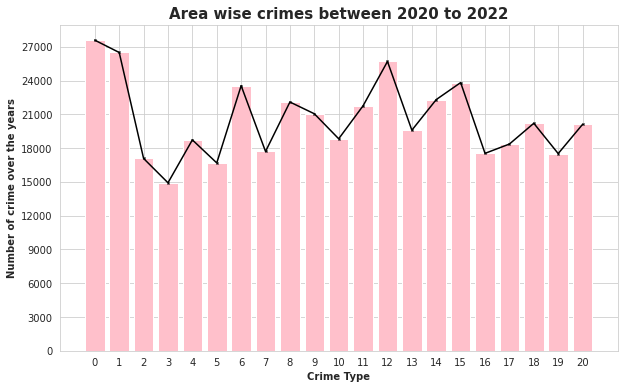

In [25]:
# Total crime committed in every area in LA from 2020 to 2022
crime_la_df_area = crime_la_df.groupby('AREA NAME', as_index = False)['Crm Cd'].count()
crime_la_df_area_xaxis = np.arange(len(crime_la_df_area))
plt.figure(figsize=(10,6));
plt.xlabel('Crime Type', fontweight = 'bold', size = 10);
plt.ylabel('Number of crime over the years', fontweight = 'bold', size = 10);
plt.title('Area wise crimes between 2020 to 2022', fontweight = 'bold', size = 15);
plt.bar(x = crime_la_df_area_xaxis, height = crime_la_df_area['Crm Cd'], color = 'pink');
plt.plot(crime_la_df_area['Crm Cd'], 'x-k', ms = 2);
plt.xticks(range(0,21,1));
plt.yticks(range(0, 28000, 3000));

### Mean of area wise crimes between 2020 to 2022

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 576x432 with 0 Axes>

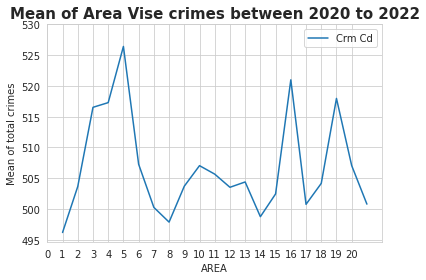

In [36]:
total_area_crime = crime_la_df[['AREA', 'Crm Cd']]
plt.figure(figsize= (8,6));
total_area_crime_pivot = pd.pivot_table(index = ['AREA'],
                                        values = ['Crm Cd'],
                                        aggfunc = 'mean',
                                        data= total_area_crime).plot();

plt.title('Mean of Area Vise crimes between 2020 to 2022',
          fontweight = 'bold',
          size = 15);
print(total_area_crime_pivot);
plt.ylabel('Mean of total crimes');
plt.xticks(range(0,21,1));
plt.yticks(range(495,535,5));

### Area wise total crimes with sex

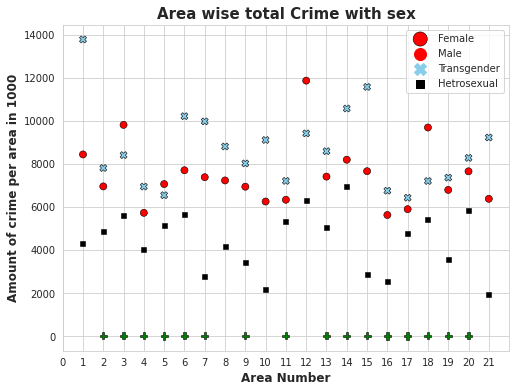

In [37]:
crime_la_df_area_sex = crime_la_df[['AREA', 'Vict Sex', 'amount_crime']]
crime_la_df_area_sex = crime_la_df_area_sex.groupby(['AREA', 'Vict Sex'], as_index= False)['amount_crime'].count()
crime_la_df_area_sex
area_sex_number = crime_la_df_area_sex['AREA']
area_sex_victim = crime_la_df_area_sex['Vict Sex']
area_sex_amount = crime_la_df_area_sex['amount_crime']
area_sex_color = {'M':'skyblue','H':'green','F':'red','X':'black'}
plt.figure(figsize=(8,6))
plt.title('Area wise total Crime with sex', fontweight='bold', size = 15);
plt.xlabel('Area Number', fontweight = 'bold', size = 12);
plt.ylabel('Amount of crime per area in 1000', fontweight = 'bold', size = 12);
sns.scatterplot(x = area_sex_number, 
                y = area_sex_amount, 
                hue= area_sex_victim, 
                data = crime_la_df_area_sex, 
                style = area_sex_victim, 
                s = 50, 
                palette = area_sex_color, 
                legend='full',
                edgecolor = 'k');
plt.xticks(range(0,22,1))
plt.legend(['Female', 'Male', 'Transgender', 'Hetrosexual'], markerscale=2);

### Crime total sex wise

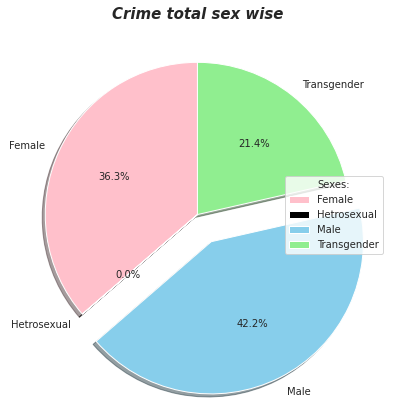

In [28]:
crime_la_df_total_sex = crime_la_df[['Crm Cd', 'Vict Sex']]
crime_la_df_total_sex = crime_la_df_total_sex.groupby('Vict Sex')['Crm Cd'].count()
crime_la_df_total_sex_labels = ['Female', 'Hetrosexual', 'Male', 'Transgender']
crime_la_df_total_sex_explode = [0,0,0.2,0]
crime_la_df_total_sex_colors = ['pink', 'black', 'skyblue', 'lightgreen']
plt.figure(figsize = (8,7), 
           frameon = True)
plt.title('Crime total sex wise',
          fontweight = 'bold',
          size = 15,
          style = 'italic');
plt.pie(crime_la_df_total_sex, 
        labels= crime_la_df_total_sex_labels, 
        startangle = 90,
        explode = crime_la_df_total_sex_explode,
        shadow = True,
        colors = crime_la_df_total_sex_colors,
        autopct='%1.1f%%');
plt.legend(title = 'Sexes:',
           loc= 'center right',
           fancybox = True,
           frameon = True);

### Crime victims as per age

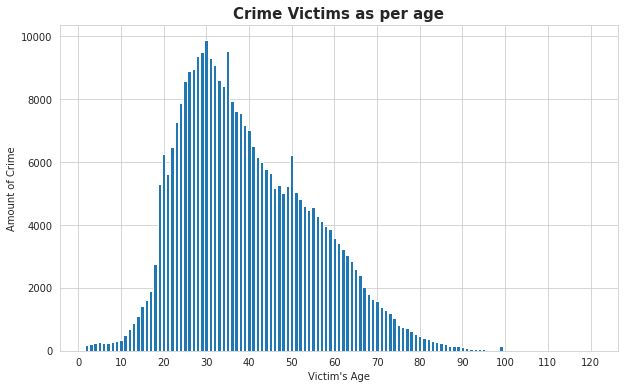

In [38]:
crime_la_df_area_age = crime_la_df.groupby('Vict Age', as_index = False)['amount_crime'].sum()
crime_la_df_area_age =crime_la_df_area_age.drop([0,1])
crime_la_df_area_age
plt.figure(figsize = (10,6),
           edgecolor = 'black');
plt.title('Crime Victims as per age',
          fontweight = 'bold',
          size = 15);
plt.bar(x = crime_la_df_area_age['Vict Age'], height = crime_la_df_area_age['amount_crime']);
plt.xticks(range(0, 130, 10))
plt.xlabel("Victim's Age");
plt.ylabel("Amount of Crime");

### Area wise crimes in 2020

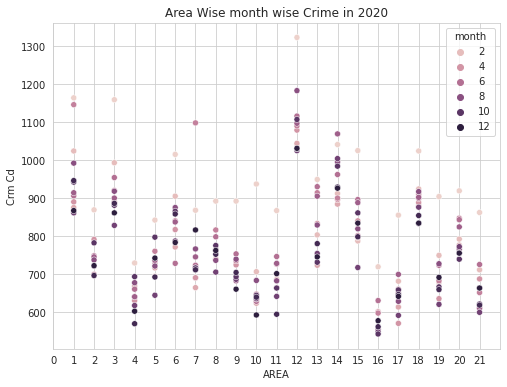

In [39]:
crime_la_df_2020 = crime_la_df[crime_la_df['year'] == 2020]
crime_la_df_2020_month = crime_la_df_2020[['month', 'AREA', 'Crm Cd']]
crime_la_df_2020_month = crime_la_df_2020_month.sort_values(by = 'month', ascending = True)
crime_la_df_2020_month_gb = crime_la_df_2020_month.groupby(['month', 'AREA'], as_index = False)['Crm Cd'].count()
crime_la_df_2020_month_gb
xaxis = crime_la_df_2020_month_gb['AREA']
yaxis = crime_la_df_2020_month_gb['Crm Cd']
hue_month = crime_la_df_2020_month_gb['month']
plt.figure(figsize= (8,6),
           edgecolor = 'k');
plt.title('Area Wise month wise Crime in 2020');
sns.scatterplot(x = xaxis, y = yaxis, hue = hue_month);
plt.xticks(range(22));

### Area wise crimes in 2021

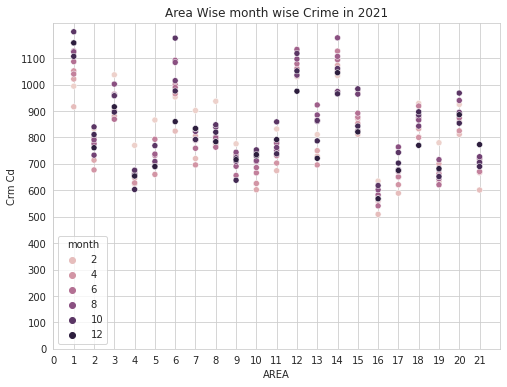

In [40]:
crime_la_df_2021 = crime_la_df[crime_la_df['year'] == 2021]
crime_la_df_2021_month = crime_la_df_2021[['month', 'AREA', 'Crm Cd']]
crime_la_df_2021_month = crime_la_df_2021_month.sort_values(by = 'month', ascending = True)
crime_la_df_2021_month_gb = crime_la_df_2021_month.groupby(['month', 'AREA'], as_index = False)['Crm Cd'].count()
crime_la_df_2021_month_gb
xaxis = crime_la_df_2021_month_gb['AREA']
yaxis = crime_la_df_2021_month_gb['Crm Cd']
hue_month = crime_la_df_2021_month_gb['month']
plt.figure(figsize= (8,6),
           edgecolor = 'k');
plt.title('Area Wise month wise Crime in 2021');
sns.scatterplot(x = xaxis, y = yaxis, hue = hue_month);
plt.xticks(range(22));
plt.yticks(range(0, 1200, 100));

### Area wise crimes in 2022

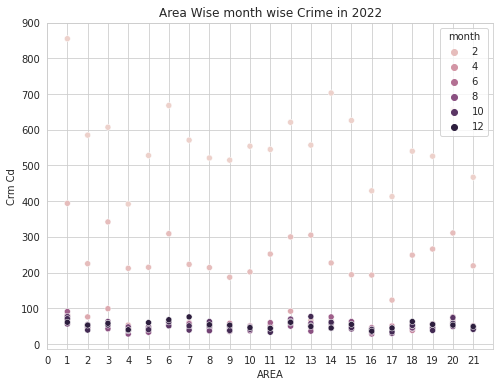

In [32]:
crime_la_df_2022 = crime_la_df[crime_la_df['year'] == 2022]
crime_la_df_2022_month = crime_la_df_2022[['month', 'AREA', 'Crm Cd']]
crime_la_df_2022_month = crime_la_df_2022_month.sort_values(by = 'month', ascending = True)
crime_la_df_2022_month_gb = crime_la_df_2022_month.groupby(['month', 'AREA'], as_index = False)[['Crm Cd']].count()
crime_la_df_2022_month_gb
xaxis = crime_la_df_2022_month_gb['AREA']
yaxis = crime_la_df_2022_month_gb['Crm Cd']
hue_month = crime_la_df_2022_month_gb['month']
plt.figure(figsize= (8,6),
           edgecolor = 'k');
plt.title('Area Wise month wise Crime in 2022');
sns.scatterplot(x = xaxis, y = yaxis, hue = hue_month);
plt.xticks(range(22));
plt.yticks(range(0, 1000, 100));

### Mean Crime Rate on the basis of Area's in LA and the hour of the day

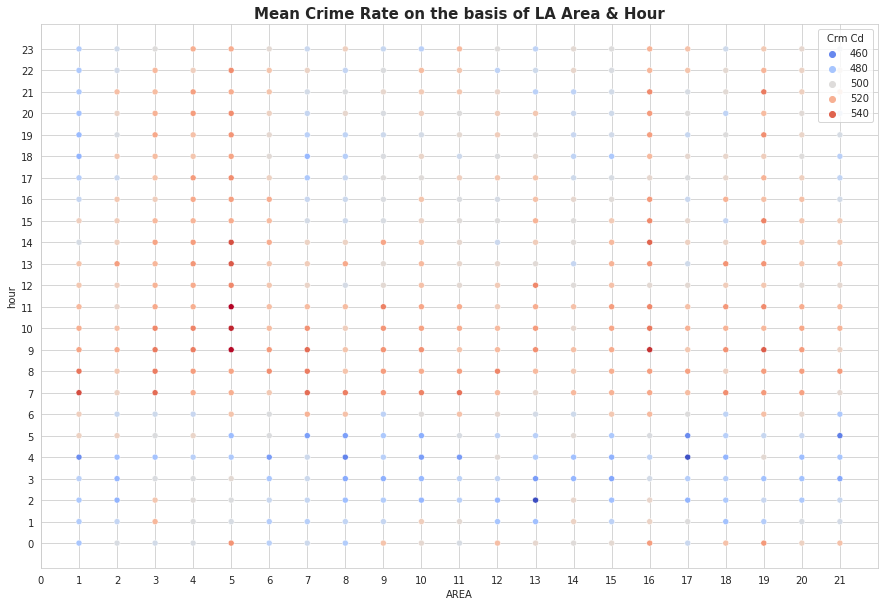

In [41]:
crime_la_df_area_hour = crime_la_df[['AREA', 'hour', 'Crm Cd']]
crime_la_df_area_hour = crime_la_df_area_hour.groupby(['AREA', 'hour'], as_index = False)['Crm Cd'].mean()
crime_la_df_area_hour
xaxis = crime_la_df_area_hour['AREA']
yaxis = crime_la_df_area_hour['hour']
hue_value = crime_la_df_area_hour['Crm Cd']

plt.figure(figsize = (15,10));
plt.title('Mean Crime Rate on the basis of LA Area & Hour',
          fontweight = 'bold',
          size = 15);
plt.xticks(range(0,22,1));
plt.yticks(range(0,24,1));
sns.scatterplot(x = xaxis, y = yaxis, hue = hue_value,
                palette = 'coolwarm');

### Mean crime rate of Area's in LA and as per hour of the day

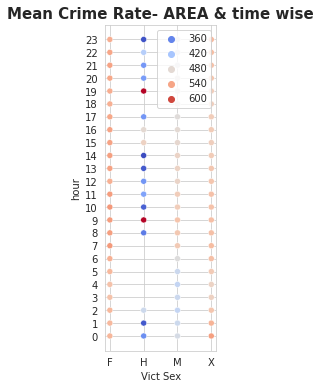

In [34]:
crime_la_df_sex_hour = crime_la_df[['Vict Sex', 'hour', 'Crm Cd']]
crime_la_df_sex_hour = crime_la_df_sex_hour.groupby(['Vict Sex', 'hour'], as_index = False)['Crm Cd'].mean()
crime_la_df_sex_hour
xaxis = crime_la_df_sex_hour['Vict Sex']
yaxis = crime_la_df_sex_hour['hour']
hue_value = crime_la_df_sex_hour['Crm Cd']

plt.figure(figsize = (2,6));
plt.title('Mean Crime Rate- AREA & time wise',
          fontweight = 'bold',
          size = 15);
plt.xticks(range(0,22,1));
plt.yticks(range(0,24,1));
sns.scatterplot(x = xaxis, y = yaxis, hue = hue_value,
                palette = 'coolwarm');
plt.legend(loc = 'upper right')

### Correlation between various columns

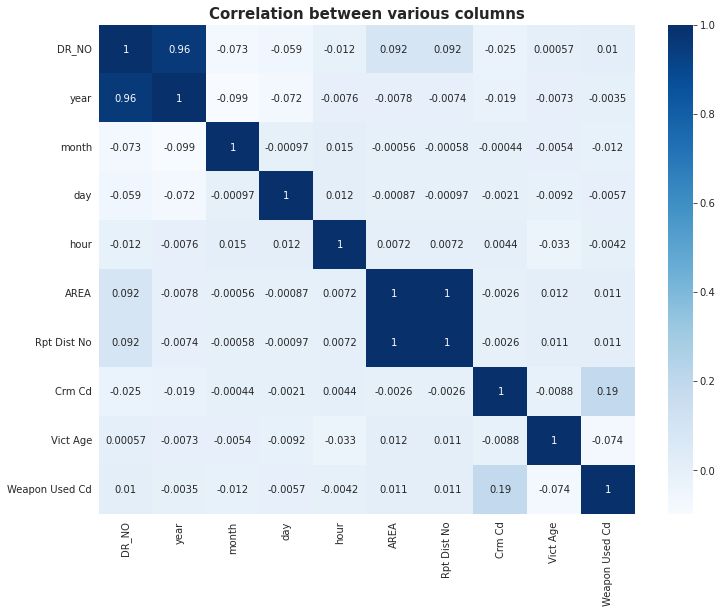

In [42]:
crime_la_df_correlation = crime_la_df.drop(columns = 'amount_crime').corr()
plt.figure(figsize= (12,9),
           edgecolor = 'black');
plt.title('Correlation between various columns',
          size = 15,
          fontweight= 'bold');
sns.heatmap(crime_la_df_correlation,
            annot= True, 
            cmap= 'Blues');